In [1]:
%pylab inline
import emcee
import programas as pg
import h5py
import MAS_library as MASL
import smoothing_library as SL
import Pk_library as PKL

Populating the interactive namespace from numpy and matplotlib


In [23]:
pathfields   = '/home/arodriguez/BACCO/bias-voids/IATE/fields_smooth/k0.75_4f/'
#fields = [#'F0z_0', 'F1z_0', 'F2z_0', 'F3z_0','F4z_0', 'simulationz_smooth_0']
R_sm = 18

model = np.load(pathfields+'Models/model_'+str(R_sm)+'_rmin_16.npy').astype(np.float32)
simu  = np.load(pathfields+'simulation_smooth_'+str(R_sm)+'.npy').astype(np.float32)

In [24]:
BoxSize = 1440
MAS = 'CIC'
threads = 10
verbose = True

In [25]:
Pk_sim = PKL.Pk(simu, BoxSize, 0, MAS, threads, verbose)
Pk_mod = PKL.Pk(model, BoxSize, 0, MAS, threads, verbose)


Computing power spectrum of the field...
Time to complete loop = 7.14
Time taken = 9.71 seconds

Computing power spectrum of the field...
Time to complete loop = 7.13
Time taken = 9.67 seconds


Text(0.5, 0, 'k')

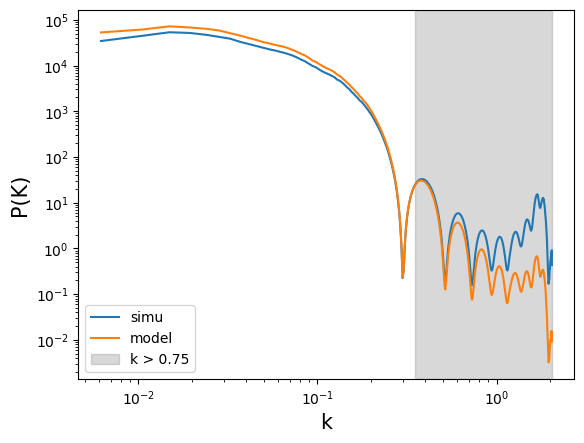

In [29]:
k_limit = 2*np.pi/R_sm

plt.plot(k, Pksim, label='simu')
plt.plot(k, Pkmod, label='model')

# Sombrea la región donde k > 0.75
plt.axvspan(k_limit, max(k), color='gray', alpha=0.3, label='k > 0.75')

# Configuración del gráfico
plt.legend()
plt.semilogy()
plt.semilogx()
plt.ylabel('P(K)', size=15)
plt.xlabel('k', size=15)

[]

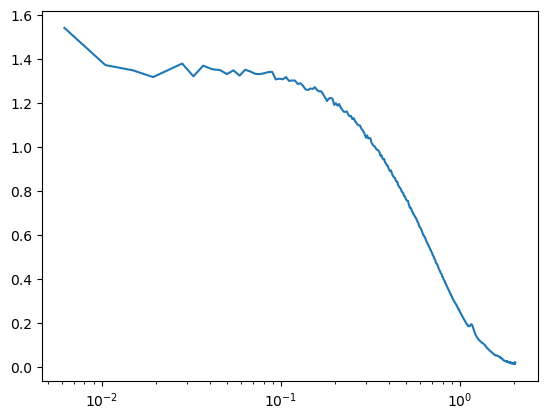

In [28]:
plt.plot(k, Pkmod/Pksim, label='simu')
plt.semilogx()